<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221228.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import re
from datetime import datetime, date, time, timezone, timedelta

from collections import defaultdict
from functools import reduce

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sales.csv',
 'online_retail.xlsx',
 '1_order_payments_dataset.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'scanner_data.csv',
 '1_customers_dataset.csv',
 'match_result_test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mall_customers.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'bz_data_analyis.csv',
 'mock_sales_data.csv',
 'groceries.csv',
 'test.csv',
 'sales_data_with_stores.csv',
 'sample-sales-data.csv',
 'ecommerce-data.csv',
 'sample_data']

In [3]:
df = pd.read_csv('sales_data_with_stores.csv')
df.head()

,store,product_group,product_code,stock_qty,cost,price,last_week_sales,last_month_sales
0,Violet,PG2,4187,498,420.76,569.91,13,58
1,Rose,PG2,4195,473,545.64,712.41,16,58
2,Violet,PG2,4204,968,640.42,854.91,22,88
3,Daisy,PG2,4219,241,869.69,1034.55,14,45
4,Daisy,PG2,4718,1401,12.54,26.59,50,285


In [7]:
df = df.assign(week_stock = round(df['last_week_sales']/(df['stock_qty'] + df['last_week_sales'])*100,2),
               mon_stcok = round(df['last_week_sales']/(df['stock_qty'] + df['last_month_sales'])*100,2)
               )
df.head()

,store,product_group,product_code,stock_qty,cost,price,last_week_sales,last_month_sales,week_stock,mon_stcok
0,Violet,PG2,4187,498,420.76,569.91,13,58,2.54,2.34
1,Rose,PG2,4195,473,545.64,712.41,16,58,3.27,3.01
2,Violet,PG2,4204,968,640.42,854.91,22,88,2.22,2.08
3,Daisy,PG2,4219,241,869.69,1034.55,14,45,5.49,4.90
4,Daisy,PG2,4718,1401,12.54,26.59,50,285,3.45,2.97


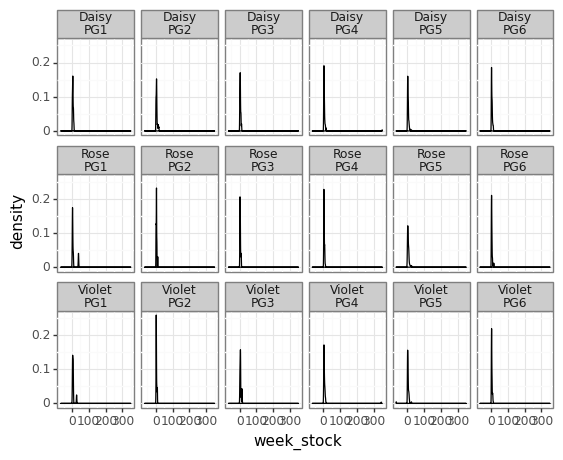

<ggplot: (8744826238793)>

In [11]:
(
    ggplot(df, aes('week_stock', fill = 'product_code')) +
    gg.geom_density(alpha = .3) +
    gg.facet_wrap('~store + product_group', ncol = 6) +
    gg.theme_bw()
)

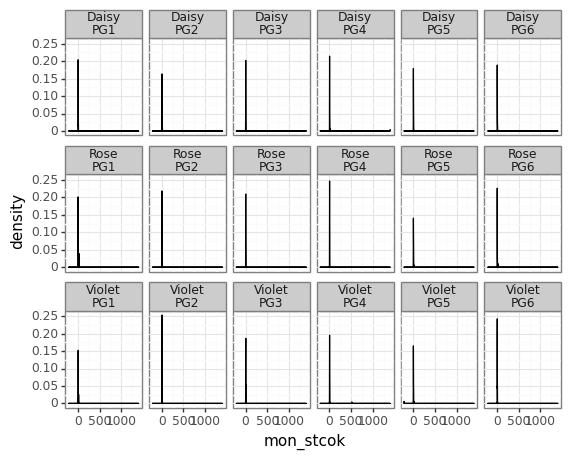

<ggplot: (8744827044940)>

In [14]:
(
    ggplot(df, aes('mon_stcok', fill = 'product_code')) +
    gg.geom_density(alpha = .3) +
    gg.facet_wrap('~store + product_group', ncol = 6) +
    gg.theme_bw()
)

In [15]:
df[df['week_stock'] >= 5]

,store,product_group,product_code,stock_qty,cost,price,last_week_sales,last_month_sales,week_stock,mon_stcok
3,Daisy,PG2,4219,241,869.69,1034.55,14,45,5.49,4.90
5,Violet,PG4,5630,287,5.85,7.59,24,116,7.72,5.96
6,Violet,PG4,5631,262,9.56,10.44,35,130,11.78,8.93
7,Daisy,PG4,5634,205,14.15,18.04,14,53,6.39,5.43
8,Daisy,PG4,2650,239,59.40,111.06,15,38,5.91,5.42
...,...,...,...,...,...,...,...,...,...,...
986,Daisy,PG4,4160,408,2.08,10.44,24,43,5.56,5.32
992,Daisy,PG4,7949,1376,8.16,8.54,97,459,6.59,5.29
995,Daisy,PG4,8048,415,11.99,11.39,28,60,6.32,5.89
996,Daisy,PG4,8050,-10,1.32,3.32,14,11,350.00,1400.00


# Iterators

In [16]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [17]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}